1. Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation 
- We want both model prediction and model interpretation
2. Model summary and brief data description

In [144]:
import pandas as pd ,numpy as np ,matplotlib.pyplot as plt
data = pd.read_csv("breast-cancer.csv" ,header = None)
col_name = ['Class' ,'age' ,'menopause' ,'tumor-size' ,'inv-nodes' ,
 'node-caps' ,'deg-malig' ,'breast' ,'breast=quad' ,'irradiat']
data.columns = col_name
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast=quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


- Data related to breast cancer and we have to  build a model that can classify given attribute whether these  are recurrent event or not  

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast=quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [122]:
cat_col = data.columns[data.dtypes == np.object]
data[cat_col].describe()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,breast,breast=quad,irradiat
count,286,286,286,286,286,286,286,286,286
unique,2,6,3,11,7,3,2,6,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,left,left_low,no
freq,201,96,150,60,213,222,152,110,218


3.  Data cleaning and feature engineering.

In [146]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()
for col in cat_col:
    data[col] = le.fit_transform(data[col])
data.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast=quad,irradiat
0,0,1,2,5,0,1,3,0,2,0
1,0,2,2,3,0,1,2,1,5,0
2,0,2,2,3,0,1,2,0,2,0
3,0,4,0,2,0,1,2,1,3,0
4,0,2,2,0,0,1,2,1,4,0


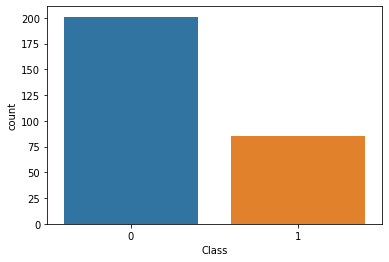

In [147]:
import seaborn as sns
ax = sns.countplot(data.Class)

In [148]:
data.Class.value_counts()/len(data.Class)

0    0.702797
1    0.297203
Name: Class, dtype: float64

In [149]:
### BEGIN SOLUTION
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)
X = data.drop(columns = ['Class'])
y = data.loc[:,'Class']
train_idx, test_idx = next(strat_shuf_split.split(X ,y))

# Create the dataframes
X_train =X.loc[train_idx,:]
y_train = y.loc[train_idx]

X_test  = X.loc[test_idx, :]
y_test  = y.loc[test_idx]


- Handling Class imbalance of training dataset

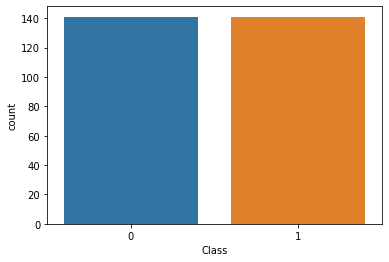

In [150]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
sns.countplot(y_train)

4. Fitting at least three different classifier models (KNN , Logistics Regression ,Logistic Regression with L1 or L2 penalty), preferably of different nature in explainability and predictability. 

- Fitting K-Nearest Neighbours  Classifiers

In [177]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score


# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70        60
           1       0.42      0.62      0.50        26

    accuracy                           0.63        86
   macro avg       0.61      0.62      0.60        86
weighted avg       0.68      0.63      0.64        86

Accuracy score:  0.63
F1 Score:  0.5


- Fitting Logistic Regression model 

In [152]:
### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.80      0.65      0.72        60
           1       0.43      0.62      0.51        26

    accuracy                           0.64        86
   macro avg       0.61      0.63      0.61        86
weighted avg       0.69      0.64      0.65        86

Accuracy score:  0.64
F1 Score:  0.51


- Fitting Logistic regression with L1 penalty

In [153]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)


lr_l1.fit(X_train, y_train)
y_pred = lr_l1.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        60
           1       0.63      0.46      0.53        26

    accuracy                           0.76        86
   macro avg       0.71      0.67      0.68        86
weighted avg       0.74      0.76      0.74        86

Accuracy score:  0.76
F1 Score:  0.53


- Fitting Logistic regression with L2 penalty 

In [154]:
# L2 regularized logistic regression
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)
lr_l2.fit(X_train, y_train)
y_pred = lr_l2.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))
### END SOLUTION


              precision    recall  f1-score   support

           0       0.80      0.67      0.73        60
           1       0.44      0.62      0.52        26

    accuracy                           0.65        86
   macro avg       0.62      0.64      0.62        86
weighted avg       0.69      0.65      0.66        86

Accuracy score:  0.65
F1 Score:  0.52


In [180]:
result = pd.DataFrame({'Model Desc': ['KNN' ,'Logistic_Regression','Logistic_L1','Logistic_L2']
                       ,'Accuracy':[0.63 ,0.64,0.76,0.65] 
                       ,'F1 Score':[0.5,0.51,0.53,0.52]})
result


,Model Desc,Accuracy,F1 Score
0,KNN,0.63,0.50
1,Logistic_Regression,0.64,0.51
2,Logistic_L1,0.76,0.53
3,Logistic_L2,0.65,0.52


SUMMARY
- The final model for prediction is Logistic regression with  L1 penalty . we can use this model both for prediction and model interpretability. The reason for Logistic regression with L1 penalty is best is because it has highest accuracy and F1 Score compare to all other model we have fitted 
- Further analysis can be done based on hyperparameter tunning of model using Grid Search approach 